# Univariate Linear Regression

For the programming notebook this week we'll build all the components for a univariate linear regression model. It is a very simple regression model, but many of the ideas here are a part of more complex regression models too, so understanding them in this simple context will be good practice.

To start, let's load some of the tools and data we'll need. *Matplotlib* will allow us to graphically plot the data and the results, making everything a little easier to interpret. *Numpy* is a library that is used a lot in machine learning when building models, but here we'll only use the function `loadtxt` as an easy way to load in the data file. The function `train_test_split` from *scikit-learn* will once again be used to split the data into *70%* training and *30%* testing.

*Note: If you're getting a `FileNotFoundError` while running this cell, make sure you downloaded data file correctly and have put that file in the same folder as your notebook.*

In [1]:
from notebook_checker import start_checks
# Start automatic globals checks
%start_checks

In [2]:
# Tell matplotlib that the plots should be shown inside the notebook as an image
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data file as floats
data = np.loadtxt('linear_data.csv', delimiter=',', dtype=float)

# Split the data into 70% training and 30% testing
training_data, testing_data = train_test_split(data, train_size=0.7)

print("First 10 rows of the training data:\n")
print(training_data[:10])

First 10 rows of the training data:

[[ 64.592 163.295]
 [ 39.796  94.761]
 [ 72.857 232.933]
 [108.673 276.735]
 [ 67.347 183.77 ]
 [138.98  360.042]
 [ 34.286 126.366]
 [ 45.306 109.891]
 [ 48.061 134.378]
 [ 97.653 289.204]]


## Numpy Arrays

The training set is now stored in a *Numpy* data matrix, with every row corresponding to a single training example of one x-value and one y-value. A data matrix is very similar to a *list of lists*, but the matrix format has some advantages, which we'll get into in later assignments. For now, we're just going to convert this data back to two simple lists (technically *Numpy* arrays, but you can use them exactly like you would a list).

This is a simple artificial data set that was generated to be suitable for linear regression, but to make it more concrete you could still view this as the housing prediction problem from the theory videos. The x-values would then be square meters and the y-values the price of the sold house in thousands of euros. This data would then be a set of records of past sales, which we're using to try and predict the price of *new* houses based on just the amount of square meters they consist of.

In [3]:
# Separate the training data into x and y arrays
x_training = training_data[:, 0]
y_training = training_data[:, 1]

# Separate the testing data into x and y arrays
x_testing = testing_data[:, 0]
y_testing = testing_data[:, 1]

print("\nTraining x-values")
print(x_training)

print("\nTraining y-values")
print(y_training)



Training x-values
[ 64.592  39.796  72.857 108.673  67.347 138.98   34.286  45.306  48.061
  97.653  89.388 119.694 116.939 125.204  50.816  94.898  26.02  141.735
 147.245 136.224  42.551 122.449  31.531  86.633  37.041 114.184  56.327
 133.469 111.429  83.878  20.51  100.408 105.918  81.122  92.143]

Training y-values
[163.295  94.761 232.933 276.735 183.77  360.042 126.366 109.891 134.378
 289.204 204.353 303.144 304.106 327.233 126.047 235.652  75.173 390.181
 358.919 361.868 150.581 332.534 105.456 194.967  91.388 308.356 150.954
 343.422 274.295 268.094  86.656 298.486 252.841 182.933 186.863]


### Assignment 1: Plotting the data

The left column of the training data matrix is now converted to a list of x-values and the right column of the training data matrix is now converted to a list of y-values. It is important to note that, even though we split the data into two lists, the indices between these two lists are linked. So, for example, the x-value at index 5 and the y-value index 5 together form a single training pair.

These pairs of values, at the same index in the x-values and the y-values lists, together form a sample of data for the sale of a single house, with its surface area and price. Viewing them as a plotted point instead of lists of numbers, would therefore probably be more informative. Use the *matplotlib* functions [plt.plot()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html) and [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to create a plot for the training data. Make sure to plot **points** and not a line, as these are individual (shuffled) samples.

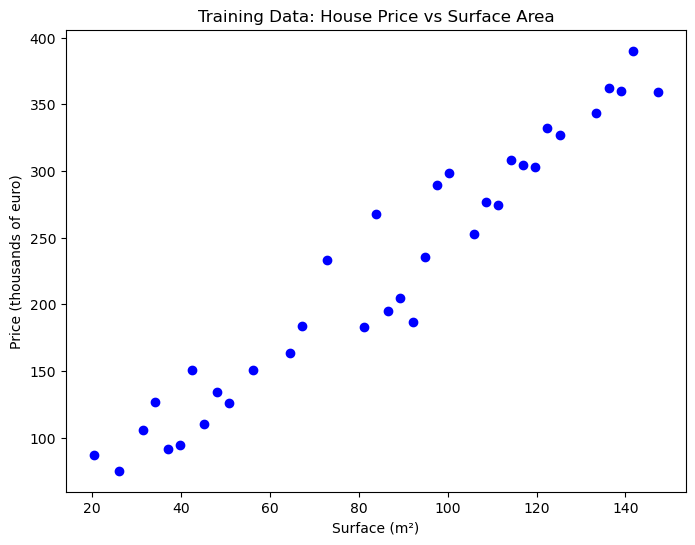

In [4]:
# YOUR CODE HERE
plt.figure(figsize=(8,6))
plt.plot(x_training, y_training, 'o', color='blue') # o points
plt.xlabel("Surface (m²)")
plt.ylabel("Price (thousands of euro)")
plt.title("Training Data: House Price vs Surface Area")
plt.show()

### Assignment 2a: Linear model

Next, we'll define the simple linear model we'll use to try and predict the y-values. A linear equation can be defined as an equation of the form:

$$\hat{y}=wx+b$$


Start by implementing the function `linear_model()`, which takes an input `x` and the model parameters `w` and `b` and returns the prediction for `y_hat` (this should be very straightforward). Next, make a function `linear_model_list()` which takes a list of x-values, applies the `linear_model()` function to every x-value in the list, and returns a new list of predicted y-values.


In [5]:
def linear_model(x, w, b):
    # YOUR CODE HERE
    # compute use the formula
    return w * x + b

def linear_model_list(x_list, w, b):
    # YOUR CODE HERE
    predictions = []          
    for x in x_list:          
        y_hat = linear_model(x, w, b)  
        predictions.append(y_hat)  
    return predictions


### Assignment 2b: Plotting a model

Now, let's plot to see what such a model would look like. This model is a linear function and so by definition it can make predictions for *any* possible x-value. If we want to plot this line, the best thing we can do is just sample a lot of points on the x-axis, compute the corresponding y-values for each of them and plot all of these points, but connect every point together with a straight line.

*Side note: This might seem like a strange way to plot a linear function, but this is actually how any function is plotted on a computer. This also includes curved functions, like for example parabola or sine waves, so it will be good practice to use the same approach here. Just take a whole lot of points and compute the output value for each of them and let the computer "connect the dots".*

Based on the plot you made before, make an approximate guess for what you think $w$ and $b$ should be. Make a range of x-values using [np.linspace()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) over a sensible interval (again, take a look at the plot from the previous cell for some hints). Compute the predicted y-values for those sampled x-values and your guesses for $w$ and $b$ using `linear_model_list()`.

Plot the training data as points, exactly as you did before, but don't use `plt.show()` yet. Next, plot the sampled x-values and the predicted y-values as a **line** using a different color (see the [plot documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html) for details). Finally, show the results. You should end up with a plot that has both your predictive line, and the training data.

Try at least 3 different values for $w$ and $b$ in your plot and see how well the predicted line fits the data.

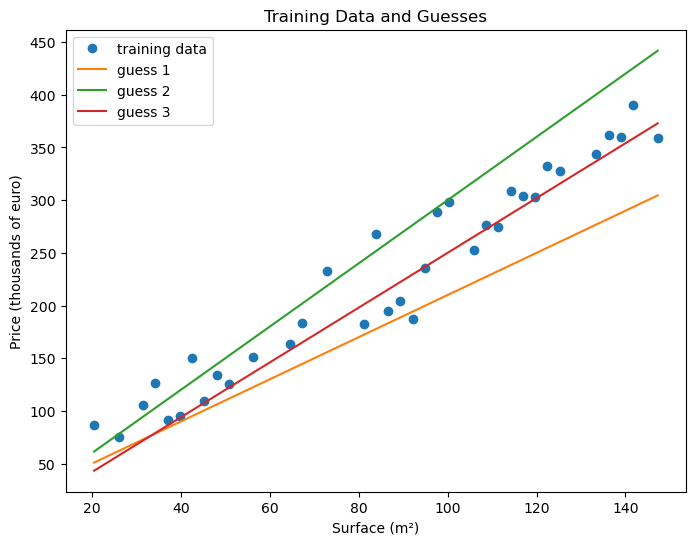

In [6]:
# YOUR CODE HERE
# x value range
x_min = float(np.min(x_training))
x_max = float(np.max(x_training))
x_line = np.linspace(x_min, x_max, 200) 

guesses = [
    ("guess 1", 2.0, 10.0),
    ("guess 2", 3, 0.0),
    ("guess 3", 2.6, -10.0),
]

plt.figure(figsize=(8,6))
plt.plot(x_training, y_training, 'o', label="training data")

for label, w_guess, b_guess in guesses:
    y_line = linear_model_list(x_line, w_guess, b_guess)
    plt.plot(x_line, y_line, label=f"{label}")

# 3) Final touches and show
plt.xlabel("Surface (m²)")
plt.ylabel("Price (thousands of euro)")
plt.title("Training Data and Guesses")
plt.legend()
plt.show()

**Q1. Which values for $w$ and $b$ did you try and which one seemed to fit the data the best?**

I tried three sets of values: (w=2.0, b=10.0), (w=3, b=0.0), and (w=2.6, b=−10.0). Among these, the guess 3 (w=2.6, b=−10.0) fit the data best, since from my eye observation, the prediction line passed through right in the middle of the points and followed the overall trend more closely.

### Assignment 3: Cost function

Now, we'll define the cost function for this linear model:

$$J(w, b) = \frac{1}{2m}\sum^m_{i=1} ((w x^{(i)} + b) - y^{(i)})^2$$

Note that this function only depends on the model parameters $w$ and $b$, and not the data vectors $\mathbf{x}$ and $\mathbf{y}$. This training data is considered to be *constant* within the cost function, as the data will not change at all. The only thing that changes the cost of the model for a specific problem is changing the model parameters $w$ and $b$.

In order to make a proper function out of the input, this function *does* of course also depend on the x-values and y-values of the training data. Define the function `linear_cost`, which takes model parameters `w` and `b`, and a data set in the form of lists of `x_values` and `y_values`, and computes the model cost for that data set. Reuse your functions from before as much as possible.

Apply this function to your guesses for $w$ and $b$ based on the plots of the training data before. Print the parameters and resulting cost for each guess. Order the guesses from highest cost to lowest cost.


In [7]:
def linear_cost(w, b, x_values, y_values):
    # YOUR CODE HERE
    m = len(x_values)
    predictions = linear_model_list(x_values, w, b)
    
    squared_errors = []
    for y_hat, y in zip(predictions, y_values):
        squared_errors.append((y_hat - y) ** 2)
    
    cost = (1/(2 * m)) * sum(squared_errors)
    return cost

# YOUR CODE HERE
results = []
for label, w, b in guesses:
    j_val = linear_cost(w, b, x_training, y_training)
    results.append((label, w, b, j_val))

# highest to lowest
results.sort(key=lambda x: x[3], reverse=True)

for label, w, b, j_val in results:
    print(f"{label}: w={w}, b={b}, cost={j_val:.2f}")

guess 1: w=2.0, b=10.0, cost=1398.34
guess 2: w=3, b=0.0, cost=939.88
guess 3: w=2.6, b=-10.0, cost=368.73


**Q2. Did the ordering of the costs for each guess correspond with your expectations? Explain your answer.**

Yes, the ordering of the costs correspond my expectations. In the plots, guess 3 looked like the best fit from my eye, and it also had the lowest cost 336.43. and guess 2 deriviate the furthest from the train datapoints, and it have the highest cost, so the cost ordering match my expectation.

### 3D plot of the cost surface

Now, let's take a further look at this cost function and construct a full 3D plot. Below is the code to plot the complete cost surface. The code takes 100 samples for possible values of $w$ and 100 samples for possible values of $b$ and then computes the cost for *every possible combination*. Here you can start to get a hint of why *Numpy* is used so often in machine learning, as we can do this complex operation in only a couple of lines of code.

The code then simply plots these computed results and connects the dots in the same way as for the line, but now forming a 3-dimensional surface. The x-axis and y-axis are the values for $w$ and $b$ respective, with the z-axis containing the corresponding cost for that combination of $w$ and $b$. The scale for $w$ is from 0 to 5 and for $b$ is from -100 to 200, as this is my own estimate of the range of sensible value combinations that will *definitely* contain the minimum of the cost function.

Make sure you understand this 3-d plot and how it relates to the line and point plots from earlier, before moving on. Understanding how this surface relates to the estimates made by the model will be critical for the rest of the assignment.

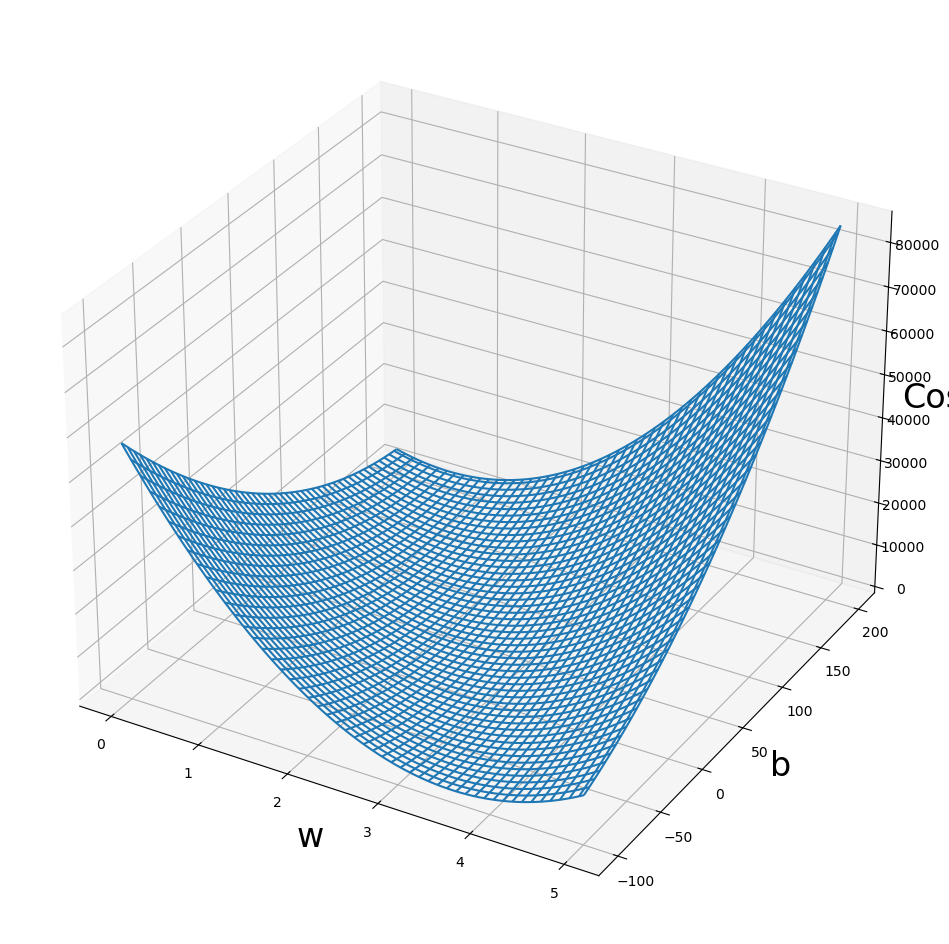

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Make a large 3D plotting figure
plt.rc('axes', labelsize=24)
ax = plt.figure(figsize=(16,12)).add_subplot(111, projection='3d')

# Create evenly spaced samples for a and b
w = np.linspace(0, 5, 100)
b = np.linspace(-100, 200, 100)

# Create the 3D plot data (no need to understand this part yet)
X, Y = np.meshgrid(w, b)
cost_map = np.vectorize(linear_cost, excluded=(2, 3))
Z = cost_map(np.ravel(X), np.ravel(Y), x_training, y_training).reshape(X.shape)

# Do the actual plotting and labeling of the axis
ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
plt.show()

## Finding the minimum of the cost function

The goal in linear regression is to try and find the model parameters $w$ and $b$ that result in the lowest possible cost on the training data, i.e. the lowest point on the surface plotted above. Given that we've just computed the cost for a lot of different combinations of $w$ and $b$, we could just select the combination with the lowest cost from this plot. This approach has two problems:

* This will really only give us quite a coarse approximation, as we've taken 100 samples for both $w$ and $b$, so the space between samples is large and ideally we'd have a more precise solution.
* It usually isn't feasible to compute all combinations in this manner (which is part of the reason why we're using this simple generated data set) and this approach won't work for larger data sets.

So instead we'll use a *gradient descent* approach, where we start with a random value for $w$ and $b$ and iteratively follow the gradient down to the minimum value. For this we'll need to be able to compute what the gradient of the cost function is at a specific point $w, b$. If we can obtain the partial derivative of the cost function with respect to $w$ and $b$, then we can easily compute the gradient at any point.

### LaTeX

The next few assignments in this notebook will require you to write some equations in *Markdown* cells. There is a language called *LaTeX* that is used in almost all scientific disciplines to write equations, which you can write directly in *Markdown* cell. We'll only need a couple of simple tools, listed below:

* All equations should be surrounded by `$$` on both sides
* `\frac{1}{2}` makes a fraction of 1 over 2: $\frac{1}{2}$
* `\sum` makes a sum symbol: $\sum$
* `^{}` makes the part in brackets superscript
* `_{}` makes the part in brackets subscript
* `\partial` makes the partial derivative symbol: $\partial$

If you *run* a markdown cell you can see the rendered equations.

### Assignment 4a: Partial derivative of $J(w, b)$ w.r.t. $b$

For this assignment you should work out what the partial derivative of the cost function is with respect to $b$. This will already give us one half of the gradient of the cost function, and it is a slightly easier derivative to start with.

Apply the rules of derivation to the equation below and simplify the result as much as possible. You should label every step with the name of the rule you use to determine the next equation. Continue to apply rules until you can no longer simplify. The first step has already been given as an example:

$$\frac{\partial}{\partial b} J(w, b)$$

Substitute the definition

$$\frac{\partial}{\partial b} \frac{1}{2m}\sum^m_{i=1} ((w x^{(i)} + b) - y^{(i)})^2$$

***Continue with the next rule here***

Constant multiple rule:

$$
= \frac{1}{2m}\,\frac{\partial}{\partial b}\left(\sum_{i=1}^{m}\big((w x^{(i)} + b) - y^{(i)}\big)^2\right)
$$

Sum rule:

$$
= \frac{1}{2m}\sum_{i=1}^{m}\frac{\partial}{\partial b}\left(\big((w x^{(i)} + b) - y^{(i)}\big)^2\right)
$$

Chain rule:

$$
= \frac{1}{2m}\sum_{i=1}^{m} 2\,\big((w x^{(i)} + b) - y^{(i)}\big)\,\frac{\partial}{\partial b}\big((w x^{(i)} + b) - y^{(i)}\big)
$$

Do last part's derivative:

$$
= \frac{1}{2m}\sum_{i=1}^{m} 2\,\big((w x^{(i)} + b) - y^{(i)}\big)
$$

$$
= \frac{1}{m}\sum_{i=1}^{m} \big((w x^{(i)} + b) - y^{(i)}\big)
$$



### Assignment 4b: First half of the gradient

With this equation you should now be able to compute the $b$ component of the gradient of the cost function at a specific point $w, b$. Fill in the function `b_gradient()` to compute the equation you obtained for this at the previous step. We will check the correctness of the function (and the equation) at later steps, so for now implement the function and continue with the next step.

In [9]:
def b_gradient(w, b, x_values, y_values):
    # YOUR CODE HERE
    m = len(x_values)
    predictions = linear_model_list(x_values, w, b)

    error_sum = 0.0
    for y_hat, y in zip(predictions, y_values):
        error_sum += (y_hat - y)

    grad_b = (1.0 / m) * error_sum
    return grad_b

### Assignment 5a: Partial derivative of $J(w, b)$ w.r.t. $w$

For this assignment you should work out what the partial derivative of the cost function is with respect to $w$. It will be very similar to steps you just completed for $b$, and together they will define the complete gradient of the cost function. 

Apply the rules of derivation to the equation below and simplify the result as much as possible. You should label every step with the name of the rule you use to determine the next equation. Continue to apply rules until you can no longer simplify. The first step has already been given as an example:

$$\frac{\partial}{\partial w} J(w, b)$$

Substitute the definition

$$\frac{\partial}{\partial w} \frac{1}{2m}\sum^m_{i=1} ((w x^{(i)} + b) - y^{(i)})^2$$

***Continue with the next rule here***

Constant multiple rule:

$$
= \frac{1}{2m}\,\frac{\partial}{\partial w}\left(\sum_{i=1}^{m}\big((w x^{(i)} + b) - y^{(i)}\big)^2\right)
$$

Sum rule:

$$
= \frac{1}{2m}\sum_{i=1}^{m}\frac{\partial}{\partial w}\left(\big((w x^{(i)} + b) - y^{(i)}\big)^2\right)
$$

Chain rule:

$$
= \frac{1}{2m}\sum_{i=1}^{m} 2\,\big((w x^{(i)} + b) - y^{(i)}\big)\,\frac{\partial}{\partial w}\big((w x^{(i)} + b) - y^{(i)}\big)
$$

Do last part derivative:

$$
= \frac{1}{2m}\sum_{i=1}^{m} 2\,\big((w x^{(i)} + b) - y^{(i)}\big)\,x^{(i)}
$$

$$
= \frac{1}{m}\sum_{i=1}^{m} \big((w x^{(i)} + b) - y^{(i)}\big)\,x^{(i)}
$$



### Assignment 5b: Second half of the gradient

With this equation you should now be able to compute the $w$ component of the gradient of the cost function at a specific point $w, b$. Fill in the function `w_gradient()` to compute the equation you obtained for this at the previous step. We will check the correctness of the function (and the equation) at later steps, so for now implement the function and continue with the next step.

In [10]:
def w_gradient(w, b, x_values, y_values):
    # YOUR CODE HERE
    m = len(x_values)
    predictions = linear_model_list(x_values, w, b)

    error_times_x_sum = 0.0
    for x_i, y_hat, y in zip(x_values, predictions, y_values):
        error_times_x_sum += (y_hat - y) * x_i

    grad_w = (1.0 / m) * error_times_x_sum
    return grad_w

### Assignment 6: Approximating the gradient

Instead of this exact computation, we can also just make a numeric approximation of the gradient. For this we can use the *difference quotient*, which defines the *rate of change* of a function $f$ at a specific value of $x$:

$$\frac{f(x + \epsilon) - f(x)}{\epsilon}$$

If $\epsilon$ is small enough, then this difference quotient should approximate the derivative of the function $f$ at $x$. We can use this same approximation for the partial derivative of the cost function with respect to $w$ and $b$:

$$\frac{\partial}{\partial w} J(w, b) \approx \frac{J(w + \epsilon,\ b) - J(w, b)}{\epsilon}$$

$$\frac{\partial}{\partial b} J(w, b) \approx \frac{J(w,\ b + \epsilon) - J(w, b)}{\epsilon}$$

We can use this numerical approximation to check the analytical gradient; if they both come out to around the same value, then it is much more likely that the analytical gradient was correct (which can be especially difficult to ensure for larger models). We can then use the much more exact, and faster, analytical gradient when optimizing the model, while having some certainty it is correct.

Implement the functions `a_gradient_approx()` and `b_gradient_approx()`, which should approximate the partial derivative of the cost function w.r.t $w$ and $b$ respectively, for a set of `x_values` and `y_values`, at the point $w,b$. The default value for epsilon is set to $\epsilon = 10^{-6}$.


In [11]:
def w_gradient_approx(w, b, x_values, y_values, eps=10**-6):
    # YOUR CODE HERE
    j_plus = linear_cost(w + eps, b, x_values, y_values)
    j_now  = linear_cost(w, b, x_values, y_values)
    grad_w_num = (j_plus - j_now) / eps
    return grad_w_num

def b_gradient_approx(w, b, x_values, y_values, eps=10**-6):
    # YOUR CODE HERE
    j_plus = linear_cost(w, b + eps, x_values, y_values)
    j_now  = linear_cost(w, b, x_values, y_values)
    grad_b_num = (j_plus - j_now) / eps
    return grad_b_num

### Assignment 7: Checking the gradient

Now that we have functions for both the analytical and the numerical gradient, let's write some code to compare them. First, write the function `check_gradient()`, which compares the results of `w_gradient()` with `w_gradient_approx()`, and the results of `b_gradient()` with `b_gradient_approx()`, for the cost function $J$ at a specific point $w,b$. The function should check the absolute difference between each approximation and its analytical counterpart, for which you can use the built-in function [abs](https://docs.python.org/3/library/functions.html#abs). If this absolute difference is greater than some threshold value `thres` for either half of the gradient, the function should print out the approximation error and return `False`. If both approximations were within the threshold range, the function should return `True`.

The function described above will only check the gradient at a specific point $w,b$. So next, write the function `check_gradient_loop()`, that will try `iterations` number of different random points $w,b$, and check the gradient for each of them. Use the built-in [random.uniform](https://docs.python.org/3/library/random.html#random.uniform) distribution to generate random values for $w$ between `w_min` and `w_max`, and for $b$ between `b_min` and `b_max`. Your function should then use `check_gradient()` to compare the analytical and approximate gradient at that random point. The function `check_gradient()` will already print an error message if the gradient approximations differ by more than `thres`, but if each of the `iterations` number of random checks pass without an error, the function `check_gradient_loop()` should print a message saying that all gradients seem correct.

Call the `check_gradient_loop()` function at the end of the cell using the training data and some reasonable ranges for $w$ and $b$. Make sure the analytical gradients all seem correct before moving to the next assignment.

*Note:* The data points on which you're evaluating, i.e. the `x_values` and `y_values`, are considered constant when determining the cost, as only the model parameters $w$ and $b$ can affect how good the model predictions are and thus change the cost. However, the data is still essential when determining the cost, as we can't measure how good the fit of the model is without data to compare the prediction to. The same holds for the gradient, where the data points in `x_values` and `y_values` are constant, but still necessary to determine the gradient, as they determine the shape of the cost function and thus, by definition, the gradient. This why `x_values` and `y_values` must be passed as arguments for all these functions, even if their value remains constant. Using `x_training` and `y_training` when calling `check_gradient_loop()` means that we check the gradients with the same data that we will use to actually calculate the gradients in the next step.


In [12]:
import random

def check_gradient(w, b, x_values, y_values, thres):
    # YOUR CODE HERE
    # Analytical
    dw_a = w_gradient(w, b, x_values, y_values)
    db_a = b_gradient(w, b, x_values, y_values)

    # Numerical
    dw_n = w_gradient_approx(w, b, x_values, y_values)
    db_n = b_gradient_approx(w, b, x_values, y_values)

    # Differences
    dw_diff = abs(dw_n - dw_a)
    db_diff = abs(db_n - db_a)

    if dw_diff > thres or db_diff > thres:
        print("Gradient check failed at w=", w, " b=", b)
        print("  dJ/dw: analytic=", dw_a, " numeric=", dw_n, " diff=", dw_diff)
        print("  dJ/db: analytic=", db_a, " numeric=", db_n, " diff=", db_diff)
        print("  (threshold:", thres, ")")
        return False
    return True
    

def check_gradient_loop(w_min, w_max, b_min, b_max, x_values, y_values, thres, iterations=10**5):
    # YOUR CODE HERE
    for i in range(iterations):
        w = random.uniform(w_min, w_max)
        b = random.uniform(b_min, b_max)
        ok = check_gradient(w, b, x_values, y_values, thres)
        if not ok:
            return False

    print("All gradient checks passed within threshold.")
    return True

# YOUR CODE HERE
check_gradient_loop(
    w_min=0.0, w_max=5.0,
    b_min=-100.0, b_max=100.0,
    x_values=x_training, y_values=y_training,
    thres=0.004,
    iterations=1000  # keep practical for the notebook; you can set to 10**5 if desired
)

Gradient check failed at w= 1.5916989683475158  b= -25.216950701396982
  dJ/dw: analytic= -10969.918015868  numeric= -10969.913684675703  diff= 0.004331192296376685
  dJ/db: analytic= -114.76457721280795  numeric= -114.76457802928053  diff= 8.164725784354232e-07
  (threshold: 0.004 )


False

It can actually be very hard to verify *with certainty* that gradient functions are correct, as that would require knowing exactly what the gradients values should be be for some combination of data set and parameter values. In practice, there isn't really a feasible way to test this *exactly*, especially as the models become larger and more complex. By comparing the gradient to an approximation based on the cost function, we can still try and convince ourselves the gradient functions are likely correct. If many repeated comparisions for different parameter values all result a gradient close to the approximation, then the functions are probably correct.

Note that if you make the value of `thres` large enough, that all checks will pass, even if the gradient is actually incorrect. Conversely, for a small enough value of `thres` some tests will also always fail, as accuracy of the gradient approximation necessarily depends on the size of $\epsilon$. Start with larger values of `thres` and systematically decrease it until you get an approximation error.

**Q3. At what value of `thres` did you start to get an approximation error? What were the actual gradient and approximated gradient that gave you the error, and how much did they differ relatively (as a percentage)? Comparing this to the size of $\epsilon$ used for the approximations, do you think it *likely* your implementations for `w_gradient` and `b_gradient` are correct?**

I first saw an approximation error at thres = 0.004 (w = 1.2933, b = 58.2148).

∂J/∂w: analytic = -5523.4615815, numeric = -5523.4574620, abs diff = 0.0041195, so relative diff ≈ 0.0000746%.

∂J/∂b: analytic = -44.23710557, numeric = -44.23710561, abs diff = 4.32e-8, so relative diff ≈ 9.76e-8%.

Given we used eps = 1e-6 with a central difference, these relative gaps are expectable from numerical approximation. I believe its likely my gradient functions are correct.


## Gradient Descent

If you're convinced that the gradient functions are correct, we can start to actually build *gradient descent*. Obtaining the correct gradient for the cost function can be the tricky part of this algorithm, but with that done, that descent part of the algorithm should be pretty straightforward.

All you really need to do is pick a starting point $w,b$ and repeatedly compute the gradient and move in the *opposite* direction, i.e. the gradient will "point up" and you want to move down. Then you just need a learning rate parameter $\alpha$ to control how big each step down is, and another threshold value to determine if your algorithm has *converged* and you've reached the minimum.

One step of gradient descent for $w$ then just becomes

$$w = w - \alpha \frac{\partial J(w,b)}{\partial w}$$

And for $b$

$$b = b - \alpha \frac{\partial J(w,b)}{\partial b}$$

The *minus* sign ensures the move is in the opposite direction, and $\alpha$ scales the size of each gradient step. Note that these gradient terms should both be computed *before* you actually update the parameters $w$ and $b$, as you want the changes to happen *simultaneously*.

Because this cost function is actually *convex*, it really doesn't matter where we start with $w$ and $b$, as all points should eventually lead to the same *global minimum*. We'll get back to what this means exactly, and in what cases you don't have these nice guarantees, in later assignments. For now, it is good to know that the starting point shouldn't matter. We could have the algorithm randomly start in some range, as with `gradient_check_loop()`, but then we'd need minimum and maximum values for both parameters, so the easy solution for now is just to have them both start at 0.

Now we already have all the elements to do one step of gradient descent. The only remaining element is really to just repeat this in a loop and compute the cost at every step. If we know the cost of the current step and the previous step, then we can compute the difference between the two, and see how much progress the algorithm made that step. This gives us two important pieces of information:

1. If the difference in cost becomes small enough, then we know the algorithm has *converged* and we can stop the loop.
2. If the difference in cost ever becomes *negative*, then the cost is increasing, and not decreasing. This means the algorithm is *diverging* and the step size of the learning rate must be too large.

If your code ever encounters situation *2*, the function should print an error message to inform the user. For situation *1* we'll also use a threshold value to determine if the difference is small enough, the default value for which is now set to $10^{-6}$. Note that you could also include using the function `check_gradient()` at every step of gradient descent, but this would be quite a bit slower. Also, as the function above takes a large random sample of the gradients, we can be pretty confident that this part should work correctly. You may add a call to `check_gradient()` in your loop, but this is not required.

### Assignment 8: Implementing Gradient Descent

Write the function `gradient_descent()` according to the description above. The function should return the converged parameters $w,b$ when completed.

When your function is done, call the function using the training data to see what your computed best estimates for $w,b$ are. Print the $w$ and $b$ you found, and then print the cost on the training data and finally, also print the cost on the testing data.


In [15]:
def gradient_descent(x_values, y_values, alpha, w_start=0, b_start=0, thres=10**-6):
    # YOUR CODE HERE
    max_iters=100000
    
    w = w_start
    b = b_start

    prev_cost = linear_cost(w, b, x_values, y_values)

    while True:
        # gradients at current (w, b)
        dw = w_gradient(w, b, x_values, y_values)
        db = b_gradient(w, b, x_values, y_values)

        # simultaneous update
        w_new = w - alpha * dw
        b_new = b - alpha * db

        new_cost = linear_cost(w_new, b_new, x_values, y_values)
        improvement = prev_cost - new_cost

        if improvement < 0:
            print("Error: Cost increased, need smaller alpha.")
            break

        if improvement < thres:
            w, b = w_new, b_new
            break

        w, b = w_new, b_new
        prev_cost = new_cost
    
    return (w, b)
        

# YOUR CODE HERE
alpha = 2.3e-4
w_best, b_best = gradient_descent(x_training, y_training, alpha=alpha, w_start=0.0, b_start=0.0, thres=1e-6)

print("w =", w_best, "b =", b_best)
print("training cost =", linear_cost(w_best, b_best, x_training, y_training))
print("testing  cost =", linear_cost(w_best, b_best, x_testing,  y_testing))

w = 2.4503718759637017 b = 16.241630138152594
training cost = 260.6867328823377
testing  cost = 276.1920768241175


It should be the case that for a large enough value of $\alpha$, the cost will always *diverge* at some point. Conversely, if $\alpha$ is very small, then the algorithm will still *converge*, but the large number of steps required means that this will take a long time. So, a good strategy is to start with a value for $\alpha$ that does *diverge* and then systematically decrease it until you get a value that *converges*.

1e-4 w = 2.3516206192656797 b = 18.08007691053746
training cost = 240.60792656352132
testing  cost = 323.6142617720997

1e-3 Error: Cost increased at step 1 , need smaller alpha.
w = 0.0 b = 0.0
training cost = 26571.799729742856
testing  cost = 31338.955233133333

1e-10 need 5+min.

**Q4. Give 3 different values for alpha: One that causes the algorithm to diverge, one that results in a reasonable converged solution, and one that is very slow to converge (> 5 minutes running time).**

Diverges: alpha = 1e-3  cost increased at step 1; w = 0.0, b = 0.0; training cost = 26571.799729742856; testing cost = 31338.955233133333

Reasonable convergence: alpha = 1e-4 w = 2.3516206192656797, b = 18.08007691053746; training cost = 240.60792656352132; testing cost = 323.6142617720997

Very slow : alpha = 1e-10 → progress is negligible; takes longer than 5 minutes to approach convergence, and cost is extremely high


**Q5. What is the best value of alpha you found? Explain why you think this is the best learning rate to use for this data set.**

Best alpha I found: 2.3e-4.

it’s the largest alpha that still gives stable, decrease and reaches the same minimum as smaller alphas, so it converges fastest and cost least. Bigger alphas diverged, while smaller ones just took longer and increase the final cost on this convex problem.

### Assignment 9: Plotting the best fit

Copy your code to plot the training data and the estimated line from before. This time, also add the testing data to the plot, making sure to use a different color point for training and testing, so you can distinguish the two.

Then, use the values your `gradient_descent()` found for $w$ and $b$ and use the function `linear_model_list()` to show the complete prediction line for that combination of $w$ and $b$.


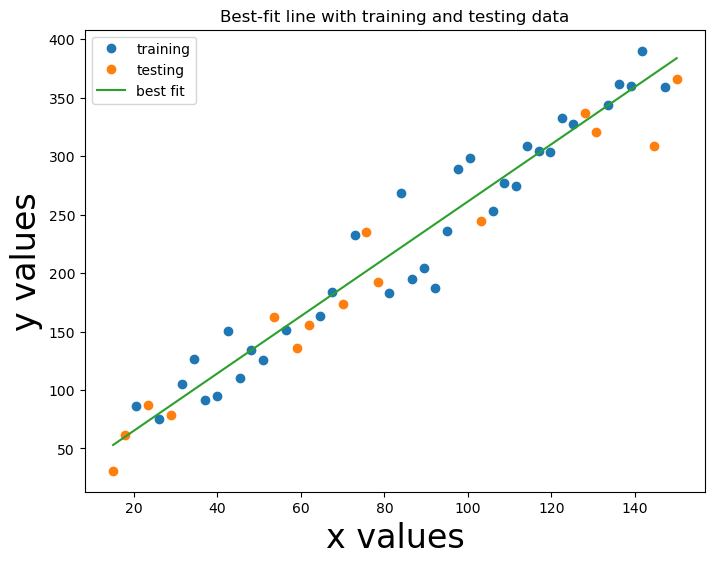

In [17]:
# YOUR CODE HERE
# Plot training and testing points
plt.figure(figsize=(8,6))
plt.plot(x_training, y_training, 'o', label='training')
plt.plot(x_testing, y_testing, 'o', label='testing')

# Make a smooth x-range and plot the fitted line
x_min = min(np.min(x_training), np.min(x_testing))
x_max = max(np.max(x_training), np.max(x_testing))
x_line = np.linspace(x_min, x_max , 200)
y_line = linear_model_list(x_line, w_best, b_best)
plt.plot(x_line, y_line, label='best fit')

plt.xlabel("Surface (m²)")
plt.ylabel("Price (thousands of euro)")
plt.title("Best-fit line with training and testing data")
plt.legend()
plt.show()

**Q6. Based on the plot above, do you think this prediction problem is well suited to a linear model? Does this match what you would expect based on the results you got for the cost for both the training and testing data in assignment 8? Explain your answers.**

Yes. The points for both training and testing fall close to a straight line, with no obvious curve in any parts, so a linear model suits the trend well. 

Yes. The testing points follow the same line as the training points, so the training dataset have good generalization. This matches the costs in assignment 8, training cost was quite low and testing cost was slightly higher but the same magnitude,not way too high, this shows this linear model is appropriate and not overfitting.